# Part 2: 1D Harmonic Oscillator - Stationary States

## The Quantum Harmonic Oscillator

The harmonic oscillator is one of the most important systems in physics because:
1. It has **exact analytical solutions** (perfect for testing our code)
2. Many physical systems behave like harmonic oscillators near equilibrium
3. It's the basis for understanding molecular vibrations, photons, and phonons

### The Potential
$$V(x) = \frac{1}{2}m\omega^2 x^2$$

where $\omega$ is the angular frequency (how fast the oscillator vibrates classically).

### Exact Energy Levels
$$E_n = \hbar\omega\left(n + \frac{1}{2}\right), \quad n = 0, 1, 2, \ldots$$

Key insight: Energy levels are **equally spaced** by $\hbar\omega$!

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

# Physical constants (atomic units)
HBAR = 1.0
M = 1.0

In [5]:
# ============================================================
# FUNCTIONS FROM PART 1
# ============================================================

def create_grid(x_min, x_max, N):
    """Create 1D spatial grid."""
    x = np.linspace(x_min, x_max, N)
    dx = x[1] - x[0]
    return x, dx

def build_kinetic(N, dx, hbar=HBAR, m=M):
    """Build kinetic energy matrix using finite differences."""
    coeff = -hbar**2 / (2 * m * dx**2)
    main_diag = -2 * np.ones(N)
    off_diag = np.ones(N - 1)
    T = coeff * (np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1))
    return T

## Defining the Harmonic Potential

The potential creates a "bowl" that confines the particle.
- Minimum at $x = 0$ (equilibrium position)
- Increases quadratically as particle moves away
- $\omega$ controls how steep the bowl is

In [6]:
def harmonic_potential(x, m=M, omega=1.0):
    """
    Harmonic oscillator potential: V(x) = (1/2) m ω² x²
    
    Parameters:
    -----------
    x : ndarray
        Position grid points
    m : float
        Particle mass
    omega : float
        Angular frequency (controls potential steepness)
        Higher ω → steeper potential → more confined particle
        
    Returns:
    --------
    V : ndarray
        Potential energy at each grid point
    """
    return 0.5 * m * omega**2 * x**2

## Building and Solving the Hamiltonian

### The Hamiltonian Matrix
$$H = T + V$$

where:
- $T$ is the kinetic energy matrix (tridiagonal, from Part 1)
- $V$ is the potential energy matrix (diagonal)

### The Eigenvalue Problem
$$H|\psi_n\rangle = E_n|\psi_n\rangle$$

We use `scipy.linalg.eigh` because:
1. `H` is Hermitian (symmetric for real matrices)
2. It returns eigenvalues in ascending order
3. It's numerically stable and efficient

In [7]:
def solve_schrodinger(T, V, n_states=5):
    """
    Solve the time-independent Schrödinger equation.
    
    Given kinetic matrix T and potential V, constructs H = T + V
    and finds the lowest n_states eigenvalues and eigenvectors.
    
    Parameters:
    -----------
    T : ndarray
        Kinetic energy matrix (N×N)
    V : ndarray
        Potential energy at each grid point (length N)
    n_states : int
        Number of lowest energy states to return
        
    Returns:
    --------
    energies : ndarray
        Energy eigenvalues E_0, E_1, ..., E_{n-1}
    wavefunctions : ndarray
        Eigenvectors (columns are wavefunctions)
        Shape: (N, n_states)
    """
    # Build full Hamiltonian
    # np.diag(V) converts 1D array V into diagonal matrix
    H = T + np.diag(V)
    
    # Solve eigenvalue problem
    # eigh is for Hermitian matrices (H = H†)
    # Returns: eigenvalues (sorted ascending), eigenvectors (columns)
    eigenvalues, eigenvectors = linalg.eigh(H)
    
    # Return only the lowest n_states
    return eigenvalues[:n_states], eigenvectors[:, :n_states]

In [8]:
# ============================================================
# SOLVE THE HARMONIC OSCILLATOR
# ============================================================

# Parameters
omega = 1.0       # Angular frequency
N = 500           # Grid points (more = better accuracy)
x_min, x_max = -10, 10  # Domain (must be large enough!)

# Step 1: Create spatial grid
x, dx = create_grid(x_min, x_max, N)
print(f"Grid: {N} points, spacing dx = {dx:.4f}")

# Step 2: Build kinetic energy matrix
T = build_kinetic(N, dx)

# Step 3: Calculate potential at each grid point
V = harmonic_potential(x, omega=omega)

# Step 4: Solve for first 5 eigenstates
n_states = 5
energies, psi = solve_schrodinger(T, V, n_states)

# Step 5: Normalize wavefunctions
# Normalization: ∫|ψ|²dx = 1
for i in range(n_states):
    norm = np.sqrt(np.trapezoid(np.abs(psi[:, i])**2, x))  # Numerical integration
    psi[:, i] /= norm

print(f"\nFound {n_states} eigenstates!")

Grid: 500 points, spacing dx = 0.0401

Found 5 eigenstates!


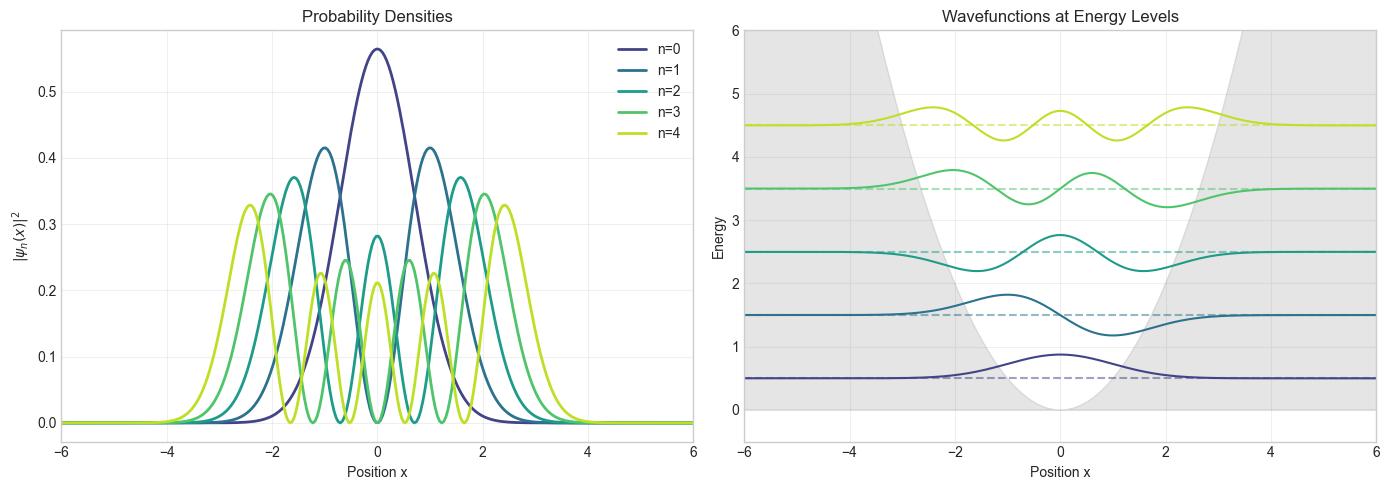

In [10]:
# ============================================================
# VISUALIZATION: Probability Densities |ψ_n(x)|²
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
colors = plt.cm.viridis(np.linspace(0.2, 0.9, n_states))

# Left: Probability densities
for n in range(n_states):
    prob_density = np.abs(psi[:, n])**2
    ax1.plot(x, prob_density, label=f'n={n}', color=colors[n], linewidth=2)

ax1.set_xlabel('Position x')
ax1.set_ylabel(r'$|\psi_n(x)|^2$')
ax1.set_title('Probability Densities')
ax1.legend()
ax1.set_xlim(-6, 6)
ax1.grid(True, alpha=0.3)

# Right: Wavefunctions offset by energy
ax2.fill_between(x, 0, V, alpha=0.2, color='gray', label='V(x)')
scale = 0.5
for n in range(n_states):
    E_n = energies[n]
    ax2.axhline(E_n, color=colors[n], linestyle='--', alpha=0.5)
    ax2.plot(x, E_n + scale * psi[:, n], color=colors[n], linewidth=1.5)

ax2.set_xlabel('Position x')
ax2.set_ylabel('Energy')
ax2.set_title('Wavefunctions at Energy Levels')
ax2.set_xlim(-6, 6)
ax2.set_ylim(-0.5, 6)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('harmonic_oscillator_states.png', dpi=150)
plt.show()

In [12]:
# ============================================================
# COMPARE NUMERICAL vs ANALYTICAL ENERGIES
# ============================================================

print("="*60)
print("ENERGY COMPARISON: Numerical vs Analytical")
print("="*60)
print(f"{'n':^5} {'Numerical':^15} {'Analytical':^15} {'Error (%)':^12}")
print("-"*60)

for n in range(n_states):
    E_numerical = energies[n]
    E_analytical = HBAR * omega * (n + 0.5)  # E_n = ℏω(n + 1/2)
    error = 100 * abs(E_numerical - E_analytical) / E_analytical
    print(f"{n:^5} {E_numerical:^15.6f} {E_analytical:^15.6f} {error:^12.4f}")

print("="*60)
print("\n✓ Errors < 1% confirm our numerical method works correctly!")

ENERGY COMPARISON: Numerical vs Analytical
  n      Numerical      Analytical     Error (%)  
------------------------------------------------------------
  0      0.499950        0.500000        0.0100   
  1      1.499749        1.500000        0.0167   
  2      2.499347        2.500000        0.0261   
  3      3.498745        3.500000        0.0359   
  4      4.497941        4.500000        0.0458   

✓ Errors < 1% confirm our numerical method works correctly!


## Understanding the Results

### Node Counting
Each wavefunction $\psi_n$ has exactly **n nodes** (zero crossings):
- $\psi_0$: 0 nodes (ground state, Gaussian shape)
- $\psi_1$: 1 node
- $\psi_2$: 2 nodes
- etc.

### Zero-Point Energy
Even the ground state has energy $E_0 = \frac{1}{2}\hbar\omega > 0$!

This is a purely quantum effect: the particle cannot be at rest due to the **uncertainty principle**.

### Next: Finite Square Well
We'll explore a different potential that shows **tunneling** - where particles penetrate classically forbidden regions!